## 1.Benchmark

In [ ]:
rm(list = ls())
setwd("/data/wuqinhua/phase/covid19/")
library(ggplot2)
library(dplyr)

In [ ]:
data <- read.csv("./Performance.csv")

avg_value_phase_ours <- data %>%
  group_by(Performance, Model) %>%
  filter(Model == 'PHASE(ours)') %>%
  summarise(avg_value = mean(value))

p2 <- ggplot(data, aes(Model, value, fill = Model))+
  geom_boxplot(linewidth = 0.4,outlier.shape = NA)+
  facet_grid(~Performance)+ 
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=10, color = "#204056"),  
        axis.text.y = element_text(size=12, color = "#204056"), 
        strip.text = element_text(size=14, face="bold"),  
        axis.title = element_blank(),       
        panel.grid = element_blank()) + 

  scale_fill_manual(values = c('#92B4C8',"#ABD3E1", "#E3EDE0", "#FFE9BE", "#FAC795", "#EEA599"))+
  geom_text(data = avg_value_phase_ours,
            aes(x = 'PHASE(ours)', y = avg_value,
                label = round(avg_value, 3)),
            vjust = -4, size = 6, color = "black")

# ggsave("./Plot/performance.pdf",p2,width=14,height=4)

`summarise()` has grouped output by 'Performance'. You can override using the
`.groups` argument.


## 2.Sample_embedding Clustering

In [5]:
import os
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.patches import Ellipse

os.chdir("/scratch/sah2p/datasets/GSE131907")

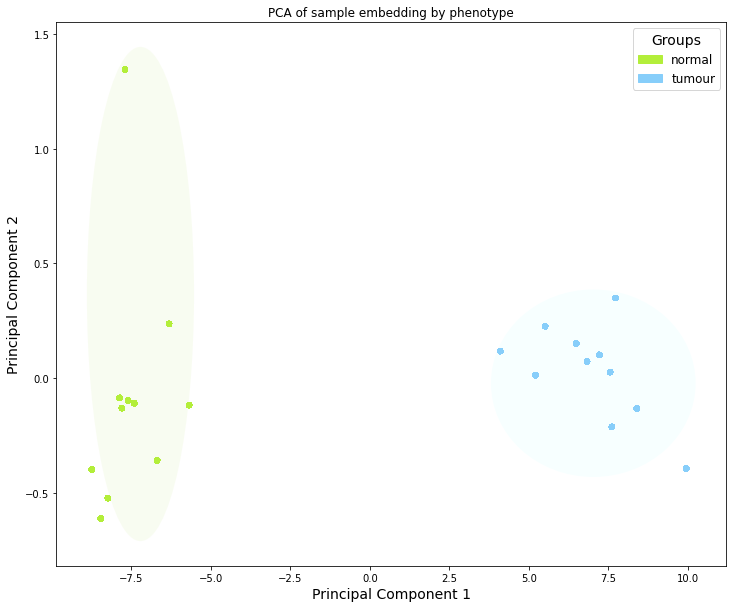

In [14]:
df_attention_matrices = pd.read_csv("./Model_result/sample_embedding.csv", index_col=0)
df_attention_matrices
df = pd.read_csv('/scratch/sah2p/datasets/GSE131907/metadata.csv')
df_sample_group = df[['sample', 'phenotype']] 
df_sample_group.set_index('sample', inplace=True)

merged_data = df_attention_matrices.join(df_sample_group)
attention_matrix_data = merged_data.iloc[:, :-1].values 
groups = merged_data['phenotype'].values
# print(groups)
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(attention_matrix_data)
# reduced_data

group_color_map = {'normal': ('#B3EE3A', '#E6F5C9'), 'tumour': ('#87CEFA', '#E0FFFF')}

plt.figure(figsize=(12, 10))
plt.gca().set_facecolor('white')
# plt.grid(False)  

plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title('PCA of sample embedding by phenotype')

for group, data in merged_data.groupby('phenotype'):
    group_data = pca.transform(data.iloc[:, :-1].values)
    min_x, min_y = group_data.min(axis=0)
    max_x, max_y = group_data.max(axis=0)
    center_x, center_y = (max_x + min_x) / 2, (max_y + min_y) / 2
    width, height = (max_x - min_x) * 1.1, (max_y - min_y) * 1.1  
    ellipse = Ellipse(xy=(center_x, center_y), width=width, height=height, edgecolor='none', facecolor=group_color_map[group][1], alpha=0.25)
    plt.gca().add_patch(ellipse)

for group in np.unique(groups):
    idx = np.where(groups == group)
    plt.scatter(reduced_data[idx, 0], reduced_data[idx, 1], c=group_color_map[group][0], label=group, edgecolor='none')

legend_handles = [mpatches.Patch(color=group_color_map[group][0], label=group) for group in group_color_map]
plt.legend(handles=legend_handles, title="Groups", loc='upper right', fontsize=12, title_fontsize=14)
plt.savefig("./Plot/sample_embedding_PCA.pdf")
plt.show()